# Set Up Google Colab and Import Dependencies

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split


# Download and Prepare the MNIST Dataset

In [13]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the input data to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images for the fully connected layers
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# Reduce the size of the dataset
reduced_size_train = int(len(x_train) * 0.3)
reduced_size_test = int(len(x_test) * 0.2)

# Randomly sample from the dataset
x_train = x_train[:reduced_size_train]
x_test = x_test[:reduced_size_test]

# Split the training data into training and validation sets (80% training, 20% validation)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)

# Output the new shapes to verify the reduction and split
print(f"Reduced training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Reduced testing data shape: {x_test.shape}")

Reduced training data shape: (14400, 784)
Validation data shape: (3600, 784)
Reduced testing data shape: (2000, 784)


# Build the Autoencoder Model

In [14]:
def build_autoencoder(input_dim):
    # Encoder
    input_img = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)

    # Decoder
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

input_dim = x_train.shape[1]
autoencoder = build_autoencoder(input_dim)
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Autoencoder

In [16]:
# Train the model
autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=64,
                          shuffle=True,
                          validation_data=(x_val, x_val))

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0973 - val_loss: 0.0986
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0960 - val_loss: 0.0984
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0957 - val_loss: 0.0978
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0953 - val_loss: 0.0969
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0946 - val_loss: 0.0964
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0944 - val_loss: 0.0966
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0940 - val_loss: 0.0958
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0935 - val_loss: 0.0953
Epoch 9/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0928 - val_loss: 0.0955
Epoch 10/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0924 - val_loss: 0.0949
Epoch 11/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0921 - val_loss: 0.0944
Epoch 12/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

# Evaluate the Autoencoder and Perform Inference

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


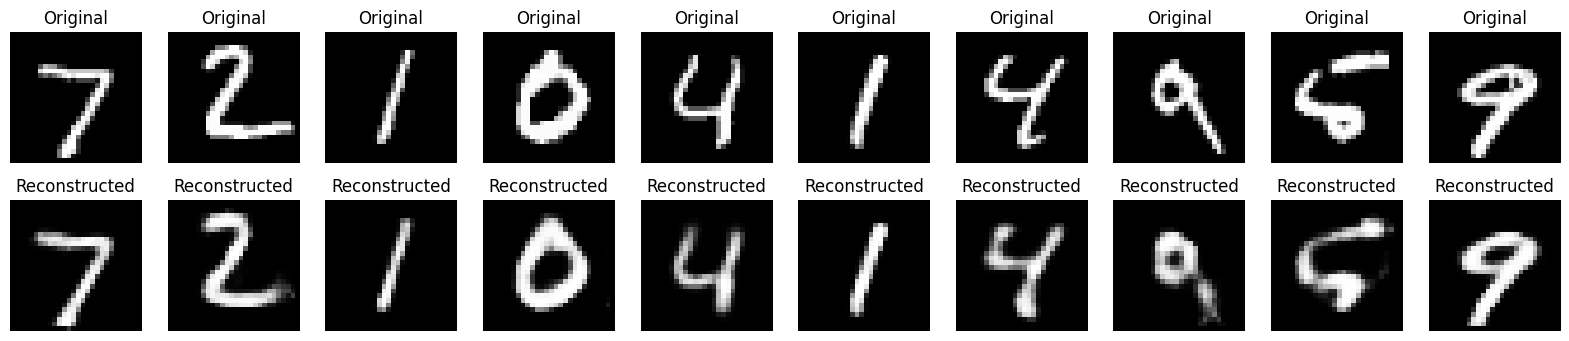

In [17]:
# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
